In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
pga = pd.read_csv('pga.csv')

In [11]:
pga.head()

,player,distance,accuracy
0,Aaron Baddeley,294.1,50.29
1,Adam Hadwin,288.2,65.43
2,Adam Scott,311.6,60.69
3,Alex Cejka,283.3,63.78
4,Alex Prugh,295.2,62.03


In [13]:
pga.distance = (pga.distance - pga.distance.mean())/pga.distance.std()
pga.accuracy = (pga.accuracy - pga.accuracy.mean())/pga.accuracy.std()

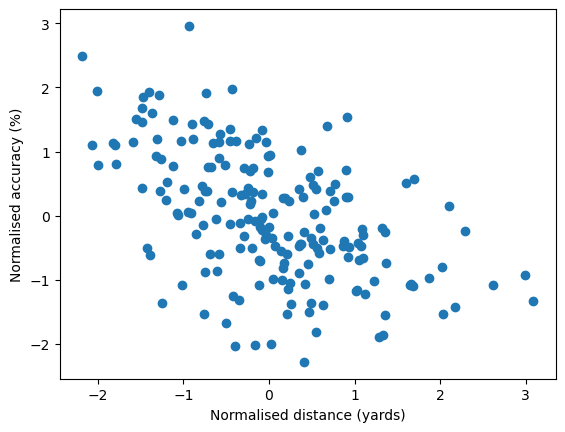

In [15]:
plt.scatter(pga.distance, pga.accuracy)
plt.xlabel('Normalised distance (yards)')
plt.ylabel('Normalised accuracy (%)')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [22]:
X = pga[['distance']]  # Features
y = pga['accuracy']    # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.6622103592458952
R^2 Score: 0.26176533330665375


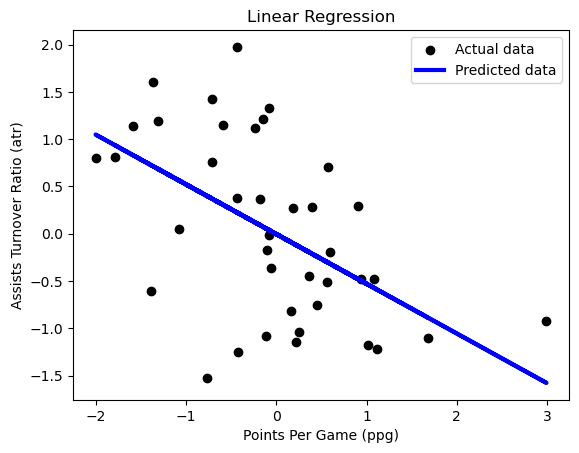

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
theta1 = lr.coef_[0]
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Predicted data')
plt.xlabel('Points Per Game (ppg)')
plt.ylabel('Assists Turnover Ratio (atr)')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [32]:
print(theta1)

-0.5262443261090997


In [34]:
def cost(theta0, theta1, x, y):
    J = 0
    m = len(x)
    for i in range(m):
        h = theta1 * x[i] + theta0
        J += (h - y[i])**2
    J /= (2*m)
    return J